<a href="https://colab.research.google.com/github/qaz027/Dojo_portfolio_project/blob/main/Project1_linearregs_v2_fquimby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


    Use the data you have cleaned in previous weeks. 
    Spend time transforming your categorical variables into numbers and use dummy encoding where appropriate.
        Here are some resources to use when dealing with categorical variables:
            Dealing with categorical features in machine learning
            Categorical Data
            Here’s All you Need to Know About Encoding Categorical Data (with Python code)

    Assign the "Item_Outlet_Sales" column as your target and the rest of the variables as your features matrix.  
    Be sure to train test split your data set!
    Build a linear regression model.
    Evaluate your test set results using r2.
    Evaluate your test set results using RMSE
    Which features are most associated with higher predicted sales?

In [5]:
import pandas as pd

infile ='/content/drive/MyDrive/Coding/Dojo - Data Science/sales_predictions.csv'
sales_pred = pd.read_csv(infile)

#clean and update values 
sales_pred.sort_values(by=['Item_Identifier','Item_Weight'], inplace=True)
sales_pred[['Item_Weight']] = sales_pred['Item_Weight'].fillna(method='pad') #backfill missing item weights
outlet_sz_miss = sales_pred["Outlet_Size"].isna()

sales_pred.sort_values(by=['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier'], inplace = True)
sales_pred[['Outlet_Size']]=sales_pred['Outlet_Size'].fillna(method='pad')
sales_pred.sort_index(inplace= True)
sales_pred.groupby(["Outlet_Type","Outlet_Location_Type","Outlet_Identifier"])["Outlet_Size"].value_counts(dropna=False)
sales_pred['Item_Fat_Content'].replace({'LF':'Low Fat', 'lf':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}, inplace=True)
sales_pred['Item_Fat_Content'].unique()




array(['Low Fat', 'Regular'], dtype=object)

In [6]:
print(sales_pred.head())

  Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30  ...  Supermarket Type1          3735.1380
1           DRC01         5.92  ...  Supermarket Type2           443.4228
2           FDN15        17.50  ...  Supermarket Type1          2097.2700
3           FDX07        19.20  ...      Grocery Store           732.3800
4           NCD19         8.93  ...  Supermarket Type1           994.7052

[5 rows x 12 columns]


In [7]:
sales_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [8]:
sales_pred['Item_Identifier'].unique().shape

(1559,)

In [9]:
sales_pred['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [10]:
sales_pred['Item_Identifier'].describe()

count      8523
unique     1559
top       FDG33
freq         10
Name: Item_Identifier, dtype: object

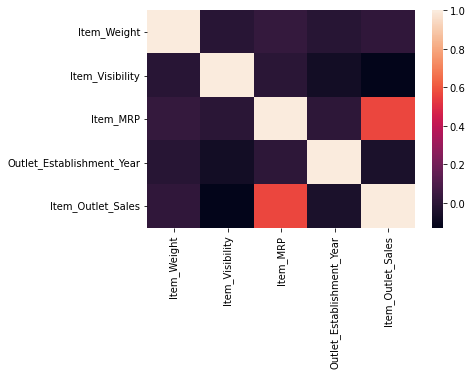

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.plot(sales_pred['Item_Identifier'],sales_pred['Item_Weight'],"o", color='blue')
corr = sales_pred.corr()
sns.heatmap(corr)

In [12]:
sales_pred['Item_Type'].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [ ]:
#sns.histplot(data=sales_pred, x='Item_Type', hue='Item_Identifier')
items = sales_pred[['Item_Identifier','Item_Type']]
items.sort_values(by = ['Item_Type'], inplace=True)
items.groupby(['Item_Type','Item_Identifier']).size().unstack(fill_value=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Item_Identifier,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,DRC13,DRC24,DRC25,DRC27,DRC36,DRC49,DRD01,DRD12,DRD13,DRD15,DRD24,DRD25,DRD27,DRD37,DRD49,DRD60,DRE01,DRE03,DRE12,DRE13,DRE15,DRE25,DRE27,DRE37,DRE48,DRE49,DRE60,DRF01,DRF03,DRF13,...,NCW05,NCW06,NCW17,NCW18,NCW29,NCW30,NCW41,NCW42,NCW53,NCW54,NCX05,NCX06,NCX17,NCX18,NCX29,NCX30,NCX41,NCX42,NCX53,NCX54,NCY05,NCY06,NCY17,NCY18,NCY29,NCY30,NCY41,NCY42,NCY53,NCY54,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
Item_Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Baking Goods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Breads,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Breakfast,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Canned,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dairy,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,7,0,0,5,0,0,0,0,7,0,0,6,0,6,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Frozen Foods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fruits and Vegetables,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hard Drinks,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Health and Hygiene,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,4,0,6,0,5,0,7,0,8,0,3,0,8,0,6,0,2,0,5,0,5,0,8,0,7,0,5,0,3,0,6,0,4,0,5,0,5,0


In [13]:
#transform Outlet ID, Outlet Type, Outlet location type, Item ID, Item Fat Content, Outlet_size
#I think Item Type and Item ID will correlate highly - may be able to simply use weight in the regression?

#sales_pred_total = pd.get_dummies(sales_pred, columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], drop_first = True)
sales_pred = pd.get_dummies(sales_pred, columns = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], drop_first = True)
print(sales_pred.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Item_Outlet_Sales                8523 non-null   float64
 6   Item_Fat_Content_Regular         8523 non-null   uint8  
 7   Item_Type_Breads                 8523 non-null   uint8  
 8   Item_Type_Breakfast              8523 non-null   uint8  
 9   Item_Type_Canned                 8523 non-null   uint8  
 10  Item_Type_Dairy                  8523 non-null   uint8  
 11  Item_Type_Frozen Foods           8523 non-null   uint8  
 12  Item_Type_Fruits and

In [14]:
from sklearn.model_selection import train_test_split
y = sales_pred['Item_Outlet_Sales']
X = sales_pred.drop(columns = ['Item_Identifier','Item_Outlet_Sales'])
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 36)
(2131, 36)
(6392,)
(2131,)


In [15]:
#Instatiate and Fit model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
# or to predict all values on the training data
train_preds = reg.predict(X_train)
# predict the values in the test set
test_preds = reg.predict(X_test)

In [16]:
#Find R^2 (and RMSE for good measure)
from sklearn.metrics import mean_squared_error
import numpy as np
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
rmse_train = np.sqrt(mean_squared_error(y_train,reg.predict(X_train)))
rmse_test = np.sqrt(mean_squared_error(y_test,reg.predict(X_test)))
print('Training RMSE:', rmse_train)
print('Testing RMSE:', rmse_test)

print("R^2 for training set: ", train_score)
print("R^2 for testing set: ", test_score)

Training RMSE: 1139.1176305025365
Testing RMSE: 1092.830326891238
R^2 for training set:  0.5615447211671323
R^2 for testing set:  0.5671301359922962


In [17]:
reg.coef_

array([  -1.29262227, -422.84482258,   15.72101709,  -18.73756951,
         62.61660111,  -28.29869384,   45.02508172,   27.77118848,
       -106.63579022,   -1.87538169,   45.61273976,   14.34738549,
         26.78362717,    5.38544247,  -12.22601532,  -27.05926919,
        327.74977527,  -21.90762231,  -39.19608557,   41.76796162,
        125.92133547,  298.69082258,  256.7598849 , -504.43347728,
        885.99595126,  293.60045789,   63.5692505 ,  671.33475107,
       -530.4118529 ,  612.34398326, -738.26531873,  655.86053096,
       -292.34995185,  922.7047646 ,  256.7598849 ,  885.99595126])

Feature: 0, Score: -1.29262
Feature: 1, Score: -422.84482
Feature: 2, Score: 15.72102
Feature: 3, Score: -18.73757
Feature: 4, Score: 62.61660
Feature: 5, Score: -28.29869
Feature: 6, Score: 45.02508
Feature: 7, Score: 27.77119
Feature: 8, Score: -106.63579
Feature: 9, Score: -1.87538
Feature: 10, Score: 45.61274
Feature: 11, Score: 14.34739
Feature: 12, Score: 26.78363
Feature: 13, Score: 5.38544
Feature: 14, Score: -12.22602
Feature: 15, Score: -27.05927
Feature: 16, Score: 327.74978
Feature: 17, Score: -21.90762
Feature: 18, Score: -39.19609
Feature: 19, Score: 41.76796
Feature: 20, Score: 125.92134
Feature: 21, Score: 298.69082
Feature: 22, Score: 256.75988
Feature: 23, Score: -504.43348
Feature: 24, Score: 885.99595
Feature: 25, Score: 293.60046
Feature: 26, Score: 63.56925
Feature: 27, Score: 671.33475
Feature: 28, Score: -530.41185
Feature: 29, Score: 612.34398
Feature: 30, Score: -738.26532
Feature: 31, Score: 655.86053
Feature: 32, Score: -292.34995
Feature: 33, Score: 922.704

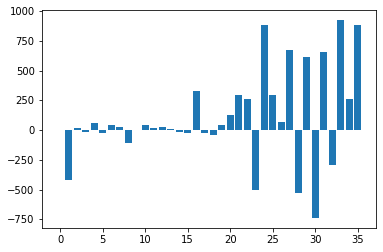

In [18]:
# get importance
importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [25]:
importance = reg.coef_
print('Variables with coefficients > 0')
for i,v in enumerate(importance):
	#print(f'Feature: {i}, Score: %.5f' % (i,v))
  if v > 0:
    print(f'Feature: {i}, Var: {X.columns[i]}')

Variables with coefficients > 0
Feature: 2, Var: Item_MRP
Feature: 4, Var: Item_Fat_Content_Regular
Feature: 6, Var: Item_Type_Breakfast
Feature: 7, Var: Item_Type_Canned
Feature: 10, Var: Item_Type_Fruits and Vegetables
Feature: 11, Var: Item_Type_Hard Drinks
Feature: 12, Var: Item_Type_Health and Hygiene
Feature: 13, Var: Item_Type_Household
Feature: 16, Var: Item_Type_Seafood
Feature: 19, Var: Item_Type_Starchy Foods
Feature: 20, Var: Outlet_Identifier_OUT013
Feature: 21, Var: Outlet_Identifier_OUT017
Feature: 22, Var: Outlet_Identifier_OUT018
Feature: 24, Var: Outlet_Identifier_OUT027
Feature: 25, Var: Outlet_Identifier_OUT035
Feature: 26, Var: Outlet_Identifier_OUT045
Feature: 27, Var: Outlet_Identifier_OUT046
Feature: 29, Var: Outlet_Size_Medium
Feature: 31, Var: Outlet_Location_Type_Tier 2
Feature: 33, Var: Outlet_Type_Supermarket Type1
Feature: 34, Var: Outlet_Type_Supermarket Type2
Feature: 35, Var: Outlet_Type_Supermarket Type3
